In [1]:
# most of this cell's code was run in notebook 'primeTau1oct25no2'
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)


def tau_delta_prime(n):
    return tau(nth_prime(n+1)-nth_prime(n))


tau_delta_prime_list =[] 
for k in range(1, 501):
    tau_delta_prime_list.append([k,tau_delta_prime(k)])
    if k%100==0:
        print(k)

with open('/Users/barrybrent/data2/run28dec25no1.txt', 'wb') as wfile:
    pickle.dump(tau_delta_prime_list, wfile) #output snipped

h_list=[[0,1]]+tau_delta_prime_list 
j_list=[(0,0)] 
for n in [1..500]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r][1] 
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))

print(h_list[:10])
print()
print(j_list[:10])
    
with open('/Users/barrybrent/data2/run28dec25no2.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) # ouput snipped

100
200
300
400
500
[[0, 1], [1, 1], [2, -24], [3, -24], [4, -1472], [5, -24], [6, -1472], [7, -24], [8, -1472], [9, -6048]]

[(0, 0), (1, 1), (2, -49), (3, 1), (4, -7041), (5, 7241), (6, -257137), (7, 263537), (8, -16709249), (9, 27299953)]


In [4]:
import pickle
from sage.all import sigma, nth_prime
import ast
import time

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack

def tau(n): 
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_delta_prime(n):
    return tau(nth_prime(n+1)-nth_prime(n))



with open('/Users/barrybrent/data2/run28dec25no1.txt', 'rb') as rfile:
    tau_delta_prime_list = pickle.load(rfile) #tauPrime(n) j-companion

with open('/Users/barrybrent/data2/run28dec25no2.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

h_list=[[0,1]]+tau_delta_prime_list 
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()



from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
charpol_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
dets=[]
tests=[]
for n in range(1, 21):
    undeformed_j_list=j_list[1:n+1]
    inputs=[pair[1] for pair in undeformed_j_list]
    pl=P_matrix(inputs) ### UNDEFORMED
    det=pl.det()
    test=det-h_list[n][1]*factorial(n)
    tests.append(test)
    print((n,test))
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
       
    
print("tests:")
print(tests)

PARI stack size set to 7000000000 bytes, maximum size set to 7000002560
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
tests:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


PARI stack size set to 7000000000 bytes, maximum size set to 7000002560
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
MINIMUM MODULI


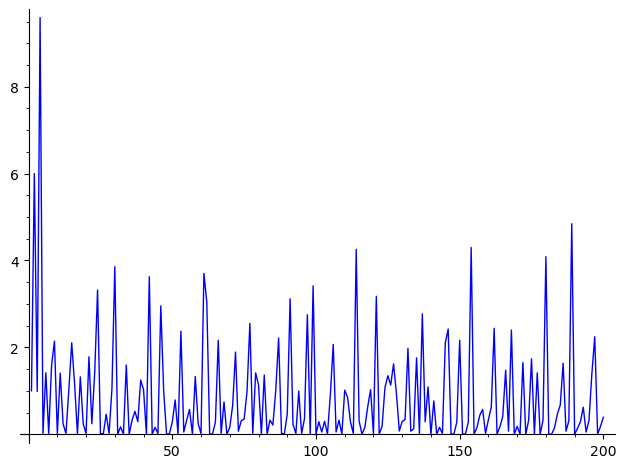

lower envelope abssicas:
[0, 2, 4, 6, 9, 12, 16, 19, 21, 25, 27, 30, 32, 34, 37, 40, 42, 44, 47, 51, 53, 56, 59, 62, 66, 68, 72, 77, 80, 82, 84, 88, 92, 94, 97, 99, 101, 103, 106, 108, 112, 115, 119, 121, 125, 128, 132, 135, 137, 139, 141, 143, 146, 150, 154, 158, 162, 166, 168, 170, 172, 175, 177, 180, 186, 189, 193, 197]
upper envelope abssicas:
[1, 3, 5, 8, 10, 14, 17, 20, 23, 26, 29, 31, 33, 36, 38, 41, 43, 45, 50, 52, 55, 57, 60, 65, 67, 71, 76, 78, 81, 83, 86, 90, 93, 96, 98, 100, 102, 105, 107, 109, 113, 118, 120, 124, 126, 131, 134, 136, 138, 140, 142, 145, 149, 153, 157, 161, 165, 167, 169, 171, 174, 176, 179, 185, 188, 192, 196]
LOGS MINIMUM MODULI


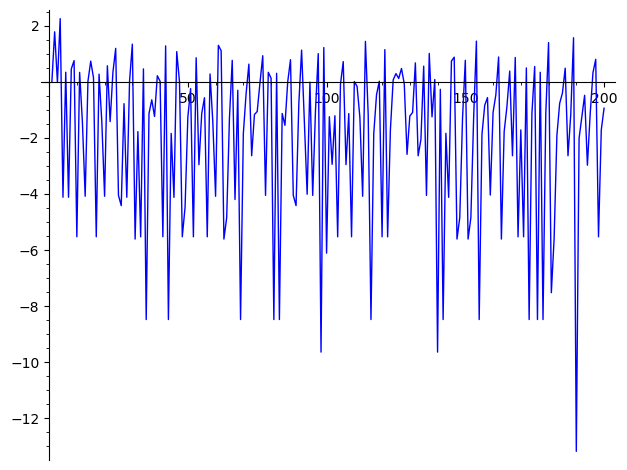

minimum logarithm of minimum modulus: -13.189296528683293823606130278


In [13]:
import pickle
from sage.all import sigma, nth_prime
import ast
import time

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack

def abssicas_lower_envelope_pairlist(pair_list):
    envelope = []
    n = len(pair_list)

    for k in range(n):
        yk = pair_list[k][1]

        if k == 0:
            if yk < pair_list[k+1][1]:
                envelope.append(k)

        elif k == n-1:
            if yk < pair_list[k-1][1]:
                envelope.append(k)

        else:
            if pair_list[k-1][1] > yk and pair_list[k+1][1] > yk:
                envelope.append(k)

    return envelope

def abssicas_upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append(k)
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append(k)
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append(k)
    return envelope


def tau(n): 
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_delta_prime(n):
    return tau(nth_prime(n+1)-nth_prime(n))



with open('/Users/barrybrent/data2/run28dec25no1.txt', 'rb') as rfile:
    tau_delta_prime_list = pickle.load(rfile) #tauPrime(n) j-companion

with open('/Users/barrybrent/data2/run28dec25no2.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

h_list=[[0,1]]+tau_delta_prime_list 
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()



from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
charpol_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
dets=[]
tests=[]
for n in range(1, 201):
    deformed_j_list=j_list[1:n+1]#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) ### UNDEFORMED
    det=pl.det()
    test=det-h_list[n][1]*factorial(n)
    tests.append(test)
    print(n)
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))

p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

print("lower envelope abssicas:")
print(abssicas_lower_envelope_pairlist(mins_list))

print("upper envelope abssicas:")
print(abssicas_upper_envelope_pairlist(mins_list))

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))



PARI stack size set to 7000000000 bytes, maximum size set to 7000002560
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
MINIMUM MODULI


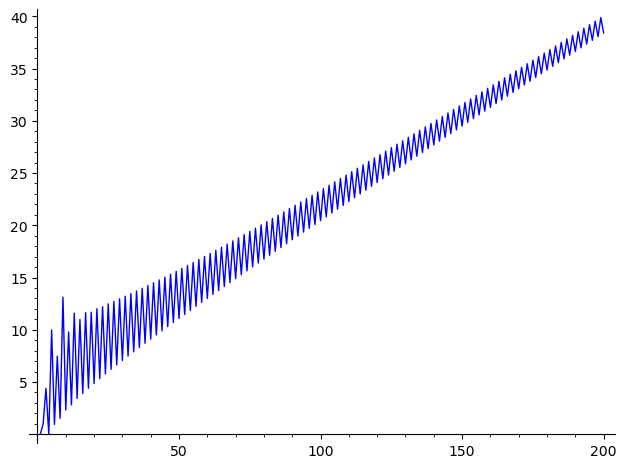

lower envelope abssicas:
[0, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]
upper envelope abssicas:
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]
LOGS MINIMUM MODULI


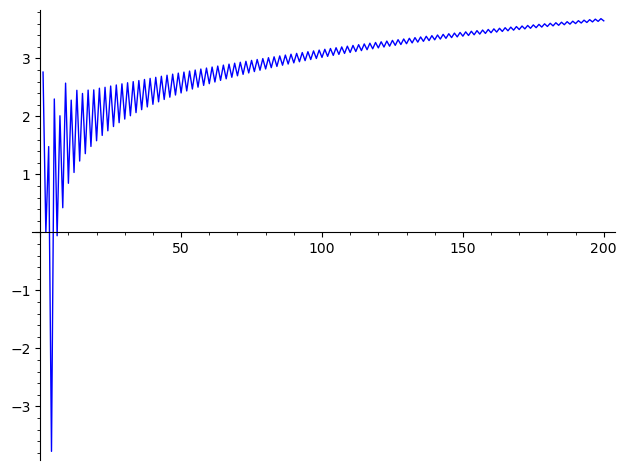

minimum logarithm of minimum modulus: -3.7736856300652829263982259257


In [12]:
import pickle
from sage.all import sigma, nth_prime
import ast
import time

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack

def abssicas_lower_envelope_pairlist(pair_list):
    envelope = []
    n = len(pair_list)

    for k in range(n):
        yk = pair_list[k][1]

        if k == 0:
            if yk < pair_list[k+1][1]:
                envelope.append(k)

        elif k == n-1:
            if yk < pair_list[k-1][1]:
                envelope.append(k)

        else:
            if pair_list[k-1][1] > yk and pair_list[k+1][1] > yk:
                envelope.append(k)

    return envelope

def abssicas_upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append(k)
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append(k)
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append(k)
    return envelope


def tau(n): 
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_delta_prime(n):
    return tau(nth_prime(n+1)-nth_prime(n))



with open('/Users/barrybrent/data2/run28dec25no1.txt', 'rb') as rfile:
    tau_delta_prime_list = pickle.load(rfile) #tauPrime(n) j-companion

with open('/Users/barrybrent/data2/run28dec25no2.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

h_list=[[0,1]]+tau_delta_prime_list 
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()



from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
charpol_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
dets=[]
tests=[]
for n in range(1, 201):
    deformed_j_list=j_list[:n]#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) ### UNDEFORMED
    det=pl.det()
    test=det-h_list[n][1]*factorial(n)
    tests.append(test)
    print(n)
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))

p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

print("lower envelope abssicas:")
print(abssicas_lower_envelope_pairlist(mins_list))

print("upper envelope abssicas:")
print(abssicas_upper_envelope_pairlist(mins_list))

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))

with open('/Users/barrybrent/data2/run28dec25no3.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run28dec25no4.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run28dec25no5.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data2/ru28ec25no6.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

with open('/Users/barrybrent/data2/ru28dec25no7.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped

with open('/Users/barrybrent/data2ru28dec25no8.txt', 'wb') as wfile:
    pickle.dump(tests, wfile) #output snipped